In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


In [2]:
(x_train, y_train), (x_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 147s 1us/step


In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
x_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

In [7]:
y_train.shape

(50000, 1)

In [8]:
y_train = y_train.reshape(-1,) #2D array can be reshaped into 1D array using reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [11]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [12]:
y_test = y_test.reshape(-1,)

In [13]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

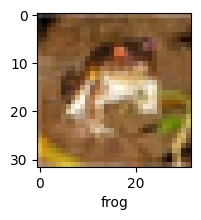

In [20]:
classes = ["airplane", "automobile", "bird", "cat", "deer",
           "dog", "frog", "horse", "ship", "truck"]

def plot_sample(x, y, index):
    plt.figure(figsize=(20, 2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

# Example usage
plot_sample(x_train, y_train, 0)

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Display one normalized image array
x_train[0]


In [29]:
from tensorflow.keras import models, layers

cnnmodel = models.Sequential([
    layers.Input(shape=(32, 32, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnnmodel.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

# Train model
cnnmodel.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate model
cnnmodel.evaluate(x_test, y_test)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 36ms/step - accuracy: 0.4958 - loss: 1.4013 - val_accuracy: 0.5951 - val_loss: 1.1552
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 52s 34ms/step - accuracy: 0.6385 - loss: 1.0340 - val_accuracy: 0.6528 - val_loss: 1.0000
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.6923 - loss: 0.8832 - val_accuracy: 0.6813 - val_loss: 0.9262
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7284 - loss: 0.7832 - val_accuracy: 0.6780 - val_loss: 0.9250
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7570 - loss: 0.6967 - val_accuracy: 0.7016 - val_loss: 0.8838
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7834 - loss: 0.6192 - val_accuracy: 0.7036 - val_loss: 0.8963
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8094 - loss: 0.5471 - val_accuracy: 0.7009 - val_loss: 0.9155
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8314 -

[1.0706524848937988, 0.6960999965667725]

In [22]:
#compile model using optimizer
annmodel.compile(optimizer='SGD',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])
annmodel.fit(x_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 31ms/step - accuracy: 0.3413 - loss: 1.8409
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.4146 - loss: 1.6499
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4478 - loss: 1.5657
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.4671 - loss: 1.5078
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.4844 - loss: 1.4621


In [30]:
# Train your CNN model
history = cnnmodel.fit(
    x_train, y_train,
    epochs=10,
    validation_data=(x_test, y_test)
)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.8925 - loss: 0.3059 - val_accuracy: 0.6880 - val_loss: 1.1460
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9102 - loss: 0.2577 - val_accuracy: 0.6894 - val_loss: 1.2581
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9205 - loss: 0.2245 - val_accuracy: 0.6963 - val_loss: 1.3836
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.9331 - loss: 0.1917 - val_accuracy: 0.6831 - val_loss: 1.5345
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.9410 - loss: 0.1671 - val_accuracy: 0.6900 - val_loss: 1.5797
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 51s 32ms/step - accuracy: 0.9482 - loss: 0.1486 - val_accuracy: 0.6870 - val_loss: 1.6822
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.9522 - loss: 0.1348 - val_accuracy: 0.6782 - val_loss: 1.8902
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 49s 31ms/step - accuracy: 0.9584 -

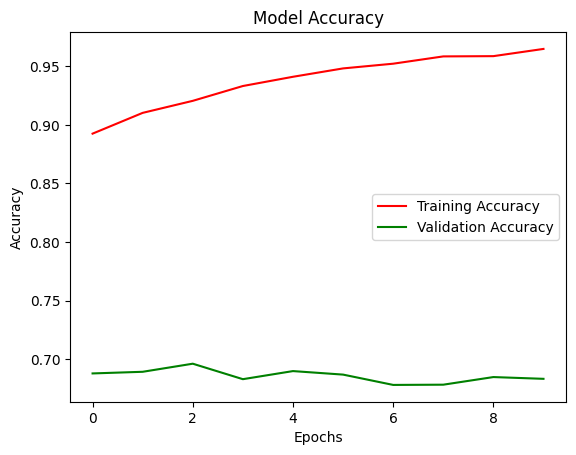

In [31]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy', color='red')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [32]:
y_pred = cnnmodel.predict(x_test)
y_pred[:5]


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


array([[1.8673441e-07, 3.8980883e-08, 2.6112349e-07, 9.9835473e-01,
        3.2869221e-13, 7.9148001e-04, 2.0170909e-10, 1.7397405e-04,
        6.7928137e-04, 1.6074590e-11],
       [9.8086483e-11, 9.9515778e-01, 4.2264224e-21, 1.6136606e-17,
        4.8038930e-21, 1.3063896e-23, 3.2213986e-26, 4.3052622e-21,
        4.8421589e-03, 3.4964958e-14],
       [9.1719897e-03, 5.2031171e-01, 2.3521796e-10, 2.0913080e-06,
        5.3551723e-08, 4.6198233e-11, 5.6207239e-07, 3.2111814e-06,
        4.3948972e-01, 3.1020690e-02],
       [9.0838802e-01, 3.8848768e-05, 2.1511644e-02, 7.4165905e-09,
        1.2558062e-05, 2.3415128e-14, 7.9496498e-09, 8.0606591e-11,
        7.0048131e-02, 8.2535280e-07],
       [6.6438216e-11, 1.1801256e-09, 2.2815317e-03, 1.4212195e-06,
        1.4889774e-01, 1.9403078e-07, 8.4881908e-01, 9.4975396e-11,
        3.4830586e-10, 1.2563292e-11]], dtype=float32)

[np.int64(3), np.int64(1), np.int64(1), np.int64(0), np.int64(6)]
[3 8 8 0 6]
airplane


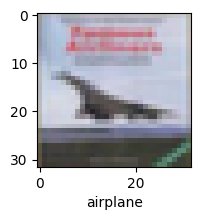

In [33]:
import numpy as np

y_classes = [np.argmax(element) for element in y_pred]
print(y_classes[:5])
print(y_test[:5])
plot_sample(x_test, y_test, 3)
cnnmodel.save('cnnmodel.h5')
predicted_label = classes[y_classes[3]]
print(predicted_label)
